<h1 style='color:#0000ec'>8 &nbsp;Estudo comparativo - Soluções numéricas e analítica</h1>

&nbsp; &nbsp; &nbsp; Importando bibliotecas <i><b>Numpy</b></i> e <i><b>Matplotlib</b></i>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; &nbsp; &nbsp; Importando bibliotecas <i><b>SciPy</b></i> :

In [2]:
import scipy.integrate as sciInt

&nbsp; &nbsp; &nbsp; Importando os modelos de <b>Malthus</b> e <b>Verhulst</b>:

In [3]:
import sys
sys.path.insert(0,'../python')

from modelo_malthus import modelo_malthus
from modelo_verhulst import modelo_verhulst

&nbsp; &nbsp; &nbsp; Importando os métodos de solução:

In [4]:
from sol_euler import sol_euler
from sol_euler_mod import sol_euler_mod
from sol_rk4 import sol_rk4

&nbsp; &nbsp; &nbsp; Declarando vetor contendo a população de Rio Grande, segundo o DATASUS, entre os anos de 2010 e 2012.

In [5]:
dados_datasus = [197228, 198049, 198842]

<h2 style='color:#0000b7' >&nbsp; 8.1 &nbsp;Obtendo aproximações numéricas e analítica</h2>

&nbsp; &nbsp; &nbsp; Declarando o passo de derivação <b>h</b>, a condição inicial <b>T0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [6]:
h = 0.001 #Passo de derivação

P0 = 197228 #Condição inicial

ti = 0 #tempo inicial

tf = 11 #tempo final

vt = np.arange(ti,tf,h) #Intervalo de 10 à 21 anos com passo h

&nbsp; &nbsp; &nbsp; Obtendo solução analítica e segundo os métodos <b>LSODA</b>, <b>RK45</b>, <b>Euler</b>, <b>Euler modificado</b> e <b>RK4</b> para o modelo de <b>Malthus</b>:

In [7]:
malthus_analitico = 197228*np.exp(0.00407*vt)

malthus_sympy = 197228*np.exp(0.00407*vt)

malthus_lsoda = sciInt.odeint(modelo_malthus, y0=P0, t=vt, tfirst=True)

malthus_rk45 = sciInt.solve_ivp(modelo_malthus, t_span=(0,max(vt)), y0=[P0], t_eval=vt)

malthus_euler = sol_euler(vt,P0,'malthus')

malthus_euler_mod = sol_euler_mod(vt,P0,'malthus')

malthus_rk4 = sol_rk4(vt,P0,'malthus')

&nbsp; &nbsp; &nbsp; Obtendo solução analítica e segundo os métodos <b>LSODA</b>, <b>RK45</b>, <b>Euler</b>, <b>Euler modificado</b> e <b>RK4</b> para o modelo de <b>Verhulst</b>:

In [8]:
verhulst_analitico = (218858*197228*np.exp(0.04285*vt))/(218858+197228*(np.exp(0.04285*vt)-1))

verhulst_sympy = 218858/(1+0.109670026568236*np.exp(-0.04285*vt))

verhulst_lsoda = sciInt.odeint(modelo_verhulst, y0=P0, t=vt, tfirst=True)

verhulst_rk45 = sciInt.solve_ivp(modelo_verhulst, t_span=(0,max(vt)), y0=[P0], t_eval=vt)

verhulst_euler = sol_euler(vt,P0,'verhulst')

verhulst_euler_mod = sol_euler_mod(vt,P0,'verhulst')

verhulst_rk4 = sol_rk4(vt,P0,'verhulst')

In [9]:
print(malthus_rk45.y[0][0])

197228.0


<h2 style='color:#0000b7' >&nbsp; 8.2 &nbsp;Calculando o erro para 2010-2012</h2>

&nbsp; &nbsp; &nbsp; A seguir, escrevemos a função <i><b>erro_datasus(	&lt;dados do DATASUS>,	&lt;Vetor solução>)</b></i> o erro das soluções obtidas com relação a população fornecida pelo DATASUS.

In [10]:
%%writefile ../python/erro_datasus.py

import numpy as np

def erro_datasus(dados_datasus,solucoes,metodo):
    
    dados = [[0, 0, 0, 0, 0]]
    
    for i in range(0,3):
        
        if metodo=='lsoda':
            
            solucao = solucoes[i][0]
            
        elif metodo=='rk45':
            
            solucao = solucoes.y[0][i]
        
        else:
            
            solucao = solucoes[i]
            
        erro_hab = dados_datasus[i] - solucao
        #print(erro_hab)
        erro_perc = (erro_hab/dados_datasus[i])*100
        #Adicionando linhas à matriz (tabela)
        dados = np.vstack([dados,[i,dados_datasus[i],round(solucao,2),round(erro_hab),str(round(erro_perc,2))+'%']])
        
    #remove a primeira linha da matriz
    dados = np.delete(dados, 0, 0)
    
    return dados

Overwriting ../python/erro_datasus.py


&nbsp; &nbsp; &nbsp; Importando função escrita em <b>[9]</b>

In [11]:
import sys
sys.path.insert(0, '../python')
from erro_datasus import erro_datasus

&nbsp; &nbsp; &nbsp; Atribuindo as aproximações à funções <i><b>erro_ibge</b></i>.

In [12]:
print(malthus_lsoda[0][0])

197228.0


In [13]:
err_malthus_analitico = erro_datasus(dados_datasus,malthus_analitico,'')

err_malthus_sympy = erro_datasus(dados_datasus,malthus_sympy,'')

err_malthus_lsoda = erro_datasus(dados_datasus,malthus_lsoda,'lsoda')

err_malthus_rk45 = erro_datasus(dados_datasus,malthus_rk45,'rk45')

err_malthus_euler = erro_datasus(dados_datasus,malthus_euler,'')

err_malthus_euler_mod = erro_datasus(dados_datasus,malthus_euler_mod,'')

err_malthus_rk4 = erro_datasus(dados_datasus,malthus_rk4,'')

In [14]:
err_verhulst_analitico = erro_datasus(dados_datasus,verhulst_analitico,'')

err_verhulst_sympy = erro_datasus(dados_datasus,verhulst_sympy,'')

err_verhulst_lsoda = erro_datasus(dados_datasus,verhulst_lsoda,'lsoda')

err_verhulst_rk45 = erro_datasus(dados_datasus,verhulst_rk45,'rk45')

err_verhulst_euler = erro_datasus(dados_datasus,verhulst_euler,'')

err_verhulst_euler_mod = erro_datasus(dados_datasus,verhulst_euler_mod,'')

err_verhulst_rk4 = erro_datasus(dados_datasus,verhulst_rk4,'')

<h2 style='color:#0000b7' >&nbsp; 8.2 &nbsp;Apresentação dos dados sobre o modelo de Malthus</h2>

&nbsp; &nbsp; &nbsp; Finalmente, exibimos os dados armazenados:

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.2.1 &nbsp;Malthus - SymPy (Analítico)</h3>

Erro entre os dados reais e solução analítica


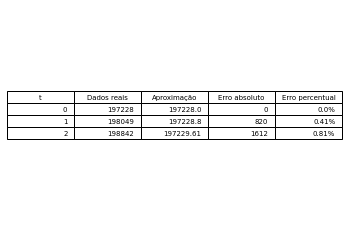

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.8' '820' '0.41%']
 ['2' '198842' '197229.61' '1612' '0.81%']]


In [15]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução analítica')
ax.table(cellText=err_malthus_analitico,colLabels=column_labels,loc='center')
plt.show()

print(err_malthus_analitico)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.2.2 &nbsp;Malthus - SciPy (LSODA)</h3>

Erro entre os dados reais e solução numérica


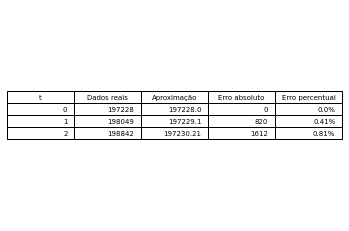

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197229.1' '820' '0.41%']
 ['2' '198842' '197230.21' '1612' '0.81%']]


In [16]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_malthus_lsoda,colLabels=column_labels,loc='center')
plt.show()

print(err_malthus_lsoda)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.2.3 &nbsp;Malthus - SciPy (RK45)</h3>

Erro entre os dados reais e solução numérica


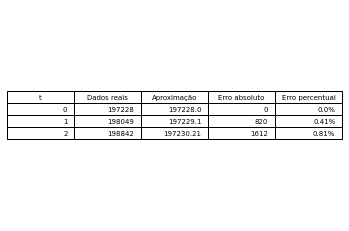

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197229.1' '820' '0.41%']
 ['2' '198842' '197230.21' '1612' '0.81%']]


In [17]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_malthus_rk45,colLabels=column_labels,loc='center')
plt.show()

print(err_malthus_rk45)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.2.4 &nbsp;Malthus - Método de Euler</h3>

Erro entre os dados reais e solução numérica


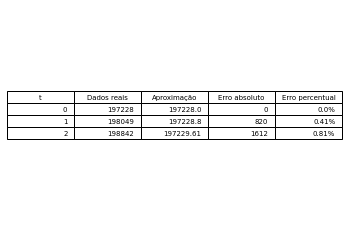

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.8' '820' '0.41%']
 ['2' '198842' '197229.61' '1612' '0.81%']]


In [19]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_malthus_euler,colLabels=column_labels,loc='center')
plt.show()

print(err_malthus_euler)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.2.5 &nbsp;Malthus - Método de Euler modificado</h3>

Erro entre os dados reais e solução numérica


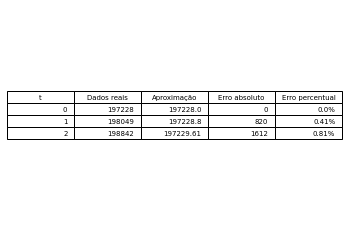

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.8' '820' '0.41%']
 ['2' '198842' '197229.61' '1612' '0.81%']]


In [21]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_malthus_euler_mod,colLabels=column_labels,loc='center')
plt.show()

print(err_malthus_euler_mod)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.2.6 &nbsp;Malthus - Método Runge-Kutta de 4a ordem</h3>

Erro entre os dados reais e solução numérica


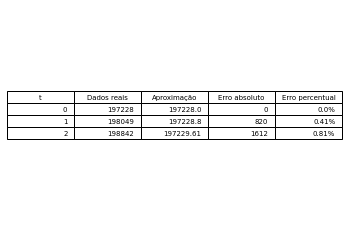

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.8' '820' '0.41%']
 ['2' '198842' '197229.61' '1612' '0.81%']]


In [22]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_malthus_rk4,colLabels=column_labels,loc='center')
plt.show()

print(err_malthus_rk4)

<h2 style='color:#0000b7' >&nbsp; 8.3 &nbsp;Apresentação dos dados sobre o modelo de Verhulst</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.1 &nbsp;Verhulst - SymPy (Analítico)</h3>

Erro entre os dados reais e solução numérica


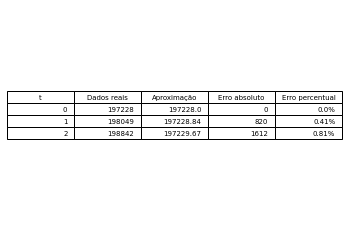

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.84' '820' '0.41%']
 ['2' '198842' '197229.67' '1612' '0.81%']]


In [23]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_verhulst_sympy,colLabels=column_labels,loc='center')
plt.show()

print(err_verhulst_sympy)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.2 &nbsp;Verhulst - SciPy (LSODA)</h3>

Erro entre os dados reais e solução numérica


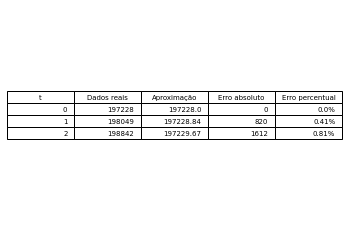

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.84' '820' '0.41%']
 ['2' '198842' '197229.67' '1612' '0.81%']]


In [24]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_verhulst_lsoda,colLabels=column_labels,loc='center')
plt.show()

print(err_verhulst_lsoda)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.3 &nbsp;Verhulst - SciPy (RK45)</h3>

Erro entre os dados reais e solução numérica


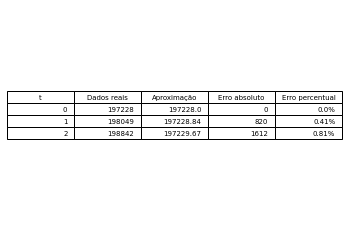

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.84' '820' '0.41%']
 ['2' '198842' '197229.67' '1612' '0.81%']]


In [25]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_verhulst_rk45,colLabels=column_labels,loc='center')
plt.show()

print(err_verhulst_rk45)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.4 &nbsp;Verhulst - Método de Euler</h3>

Erro entre os dados reais e solução numérica


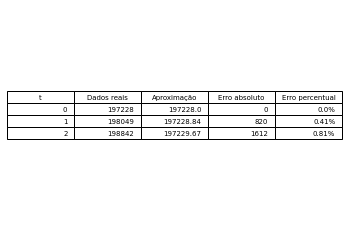

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.84' '820' '0.41%']
 ['2' '198842' '197229.67' '1612' '0.81%']]


In [26]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_verhulst_euler,colLabels=column_labels,loc='center')
plt.show()

print(err_verhulst_euler)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.5 &nbsp;Verhulst - Método de Euler modificado</h3>

Erro entre os dados reais e solução numérica


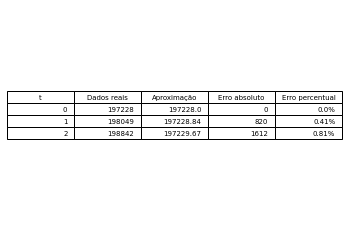

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.84' '820' '0.41%']
 ['2' '198842' '197229.67' '1612' '0.81%']]


In [27]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_verhulst_euler_mod,colLabels=column_labels,loc='center')
plt.show()

print(err_verhulst_euler_mod)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.6 &nbsp;Verhulst - Método de Runge-Kutta de 4a ordem</h3>

Erro entre os dados reais e solução numérica


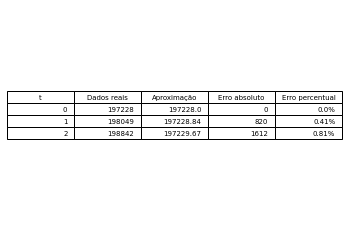

[['0' '197228' '197228.0' '0' '0.0%']
 ['1' '198049' '197228.84' '820' '0.41%']
 ['2' '198842' '197229.67' '1612' '0.81%']]


In [28]:
fig, ax =plt.subplots(1,1)
column_labels=['t','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre os dados reais e solução numérica')
ax.table(cellText=err_verhulst_rk45,colLabels=column_labels,loc='center')
plt.show()

print(err_verhulst_rk45)

<h2 style='color:#0000b7' >&nbsp; 8.2 &nbsp;Erro entre a solução numérica e analítica</h2>

In [37]:
from f_erro import f_erro

array([[197228.        ],
       [197229.10447989],
       [197230.20896597],
       ...,
       [209755.72104742],
       [209756.89568281],
       [209758.07032477]])

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.2.1 &nbsp;Modelo de Malthus</h3>

In [43]:
err_num = malthus_analitico - malthus_lsoda
plt.plot(vt,abs(err_num),'m',label='LSODA')
#plt.plot(vt,abs(f_erro(malthus_analitico,malthus_rk45.y[0])),'c',label='RK45')
#plt.plot(vt,abs(f_erro(malthus_analitico,malthus_euler)),'c',label='Euler')
#plt.plot(vt,abs(f_erro(malthus_analitico,malthus_euler_mod)),'c',label='Euler modificado')
#plt.plot(vt,abs(f_erro(malthus_analitico,malthus_rk4)),'c',label='RK4')

plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Nº de Habitantes')
plt.legend()
plt.show()


KeyboardInterrupt



<h2 style='color:#0000b7' >&nbsp; 8.3 &nbsp;Simulação para o ano de 2021</h2>

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.1 &nbsp;Modelo de Malthus</h3>

In [29]:
%%writefile ../python/erro_n.py

import numpy as np

def erro_n(dados,hab_real,approx,metodo):
    
    erro_hab = abs(hab_real - approx)
    erro_perc = (erro_hab/hab_real)*100
    dados = np.vstack([dados,[str(metodo),hab_real,round(approx,2),round(erro_hab),str(round(erro_perc,2))+'%']])
    
    return dados

Overwriting ../python/erro_n.py


In [30]:
from erro_n import erro_n

Erro entre os dados reais e solução numérica


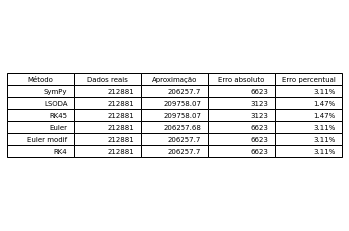

[['SymPy' '212881' '206257.7' '6623' '3.11%']
 ['LSODA' '212881' '209758.07' '3123' '1.47%']
 ['RK45' '212881' '209758.07' '3123' '1.47%']
 ['Euler' '212881' '206257.68' '6623' '3.11%']
 ['Euler modif' '212881' '206257.7' '6623' '3.11%']
 ['RK4' '212881' '206257.7' '6623' '3.11%']]


In [31]:
hab_real = 212881
dados = [[0, 0, 0, 0, 0]]
dados = erro_n(dados,hab_real,malthus_sympy[-1],'SymPy')
dados = erro_n(dados,hab_real,malthus_lsoda[-1][0],'LSODA')
dados = erro_n(dados,hab_real,malthus_rk45.y[0][-1],'RK45')
dados = erro_n(dados,hab_real,malthus_euler[-1],'Euler')
dados = erro_n(dados,hab_real,malthus_euler_mod[-1],'Euler modif')
dados = erro_n(dados,hab_real,malthus_rk4[-1],'RK4')
dados = np.delete(dados, 0, 0)

fig, ax =plt.subplots(1,1)
column_labels=['Método','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre a estimativa do IBGE e solução numérica para 2021')
ax.table(cellText=dados,colLabels=column_labels,loc='center')
plt.show()

print(dados)

<h3 style='color:#b50000' >&nbsp; &nbsp; 8.3.2 &nbsp;Modelo de Verhulst</h3>

Erro entre a estimativa do IBGE e solução numérica para 2021


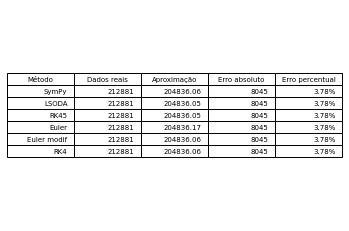

[['SymPy' '212881' '204836.06' '8045' '3.78%']
 ['LSODA' '212881' '204836.05' '8045' '3.78%']
 ['RK45' '212881' '204836.05' '8045' '3.78%']
 ['Euler' '212881' '204836.17' '8045' '3.78%']
 ['Euler modif' '212881' '204836.06' '8045' '3.78%']
 ['RK4' '212881' '204836.06' '8045' '3.78%']]


In [32]:
hab_real = 212881
dados = [[0, 0, 0, 0, 0]]
dados = erro_n(dados,hab_real,verhulst_sympy[-1],'SymPy')
dados = erro_n(dados,hab_real,verhulst_lsoda[-1][0],'LSODA')
dados = erro_n(dados,hab_real,verhulst_rk45.y[0][-1],'RK45')
dados = erro_n(dados,hab_real,verhulst_euler[-1],'Euler')
dados = erro_n(dados,hab_real,verhulst_euler_mod[-1],'Euler modif')
dados = erro_n(dados,hab_real,verhulst_rk4[-1],'RK4')
dados = np.delete(dados, 0, 0)

fig, ax =plt.subplots(1,1)
column_labels=['Método','Dados reais','Aproximação', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')

print('Erro entre a estimativa do IBGE e solução numérica para 2021')
ax.table(cellText=dados,colLabels=column_labels,loc='center')
plt.show()

print(dados)